# Music Genre Classification

In [ ]:
# Import Libraries

from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter

import tensorflow as tf

##Overview

By Asis Johnson & India Easton

The Music Genre Classification project aims to develop a machine learning model that can accurately classify music tracks into different genres based on their audio features. By analyzing a dataset of music tracks with associated genres, the project seeks to explore the relationships between various audio features and genres to build a predictive model capable of classifying unseen tracks into predefined genre categories.

Music genre classification is a fundamental task in the field of music information retrieval, with applications ranging from recommendation systems to music tagging and organization. This project focuses on leveraging machine learning techniques to automate the process of genre classification, allowing for efficient and scalable categorization of large music libraries.

## Setup and Preprocessing

### Load the Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/spotify_data.csv'

music_data = pd.read_csv(file_path, sep=',', encoding='latin-1')

display(music_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,genres,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,21st century classical,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,432hz,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,8-bit,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,[],1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,a cappella,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,g funk,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,gabba,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,gabonese pop,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,gaian doom,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


### Randomize

In [ ]:
# Randomize Data

# Shuffle rows.
indices = np.arange(music_data.shape[0])
print('indices:', indices, '\n')

# Shuffle indices.
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# Change the ordering of the original dataframe.
music_data = music_data.reindex(shuffled_indices)
display(music_data)

indices: [     0      1      2 ... 170650 170651 170652] 

shuffled indices: [107349  16271  90972 ... 152315 117952  43567] 



,genres,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
107349,birmingham grime,2013,0.015800,['Parmalee'],0.551,214933,0.8630,0,3Bdqlr7jQLNhITAgcBGQBG,0.00000,11,0.0843,-3.506,1,Close Your Eyes,50,2013-12-10,0.0322,143.952
16271,instrumental progressive metal,2003,0.006610,['JAY-Z'],0.494,234627,0.8870,1,7sLpSWxQazJzDVG6YGzlVs,0.00000,6,0.1030,-4.297,0,99 Problems,61,2003-11-14,0.3980,89.554
90972,merseybeat,2014,0.047700,['Sam Hunt'],0.590,235507,0.9400,0,3BuPop8SzLG2Q88TJcFAjp,0.00000,9,0.3790,-4.124,1,Raised On It,54,2014-10-27,0.0409,94.020
84553,hawaiian hip hop,1981,0.000473,['Iron Maiden'],0.340,288947,0.9740,0,7EvjTEzuv7TWaIaWY63sWV,0.09280,0,0.3730,-5.114,1,Drifter - 2015 Remaster,29,1981-02-02,0.1060,101.276
75895,jazz orchestra,1930,0.994000,"['Markos Vamvakaris', 'Apostolos Xatzixristos']",0.410,197653,0.1690,0,38PozVGXXoeO8dTEVzy74Y,0.90100,2,0.1130,-18.862,1,Soultana maurofora,0,1930-01-01,0.0391,93.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97639,sierreno,1964,0.154000,['The Rolling Stones'],0.585,154067,0.9400,0,0emy2KUGnNZWIZx8DEfxDi,0.00650,8,0.3250,-9.198,1,Carol,21,1964-05-30,0.0407,88.430
95939,dark disco,1956,0.929000,['Judy Garland'],0.195,285533,0.0510,0,0xLEYIpwJqi9gI5yK9EJZ6,0.00173,7,0.5930,-21.362,1,"Dirty Hands, Dirty Face",11,1956,0.0361,82.479
152315,classical horn,2003,0.550000,['Nujabes'],0.776,239693,0.4070,0,07JIJUJdAP9LiyYS5rS8cR,0.05790,6,0.1180,-8.135,0,A day by atmosphere supreme,42,2003-08-21,0.1400,97.985
117952,nl folk,1985,0.000003,['Destruction'],0.161,276107,0.9760,0,2TNiNhyFLXAjtBuVydgYfo,0.44600,11,0.0915,-8.428,0,Bestial Invasion,35,1985,0.0913,173.229


###Genre Filtering

Many of the genres in the data are sub genres a part of a much larger genre. We want to add a column that identifies what larger genre each song is a part of, and then filter out songs that are a not a part of any of the specified genres.

In [ ]:
# Most listened to genres
genres_to_keep = ['pop', 'country', 'dance', 'rap', 'rock', 'classical', 'jazz',
                  'soul' 'indie', 'latin', 'metal', 'reggae', 'folk', 'funk',
                  'gospel', 'punk', 'techno', 'blues', 'disco', 'hip hop']

# Add a column that identifies which genre flag the original genre name is
# associated with
music_data['genre_flag'] = ''
for genre in genres_to_keep:
    music_data.loc[music_data['genres'].str.contains(genre, case=False),
                   'genre_flag'] = genre

# Filter out rows that are associated with genres that are not in the top 20
# listened to music genres
music_data = music_data[music_data['genre_flag'] != '']

display(music_data)

,genres,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genre_flag
16271,instrumental progressive metal,2003,0.006610,['JAY-Z'],0.494,234627,0.887,1,7sLpSWxQazJzDVG6YGzlVs,0.00000,6,0.1030,-4.297,0,99 Problems,61,2003-11-14,0.3980,89.554,metal
84553,hawaiian hip hop,1981,0.000473,['Iron Maiden'],0.340,288947,0.974,0,7EvjTEzuv7TWaIaWY63sWV,0.09280,0,0.3730,-5.114,1,Drifter - 2015 Remaster,29,1981-02-02,0.1060,101.276,hip hop
75895,jazz orchestra,1930,0.994000,"['Markos Vamvakaris', 'Apostolos Xatzixristos']",0.410,197653,0.169,0,38PozVGXXoeO8dTEVzy74Y,0.90100,2,0.1130,-18.862,1,Soultana maurofora,0,1930-01-01,0.0391,93.890,jazz
5067,outer hip hop,1947,0.389000,['Frankie Yankovic'],0.875,169760,0.391,0,1HK6Zbd0cqB6c67jLVtWjI,0.00000,7,0.0400,-7.549,0,Just Because,9,1947,0.0490,127.005,hip hop
97383,post-rock,1963,0.742000,['Ray Price'],0.482,168267,0.272,0,3GBqKmJ62SJ943NQ9i1JuE,0.00000,10,0.0803,-13.752,1,A Girl in the Night,17,1963,0.0349,115.669,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86293,album rock,1990,0.287000,['InspiraciÃ²n'],0.285,304053,0.717,0,7Azhuk7zD1duTn4VzjzbNO,0.00000,11,0.7830,-9.620,0,El seÃ±or es mi Rey,40,1990-06-15,0.0434,84.440,rock
122579,classical organ,2009,0.002050,['Great White'],0.449,274493,0.896,0,1PN7Ax4uQf1OP5ULW8XANp,0.14800,0,0.3370,-7.068,1,Kick Start My Heart,47,2009-02-01,0.0865,180.055,classical
95939,dark disco,1956,0.929000,['Judy Garland'],0.195,285533,0.051,0,0xLEYIpwJqi9gI5yK9EJZ6,0.00173,7,0.5930,-21.362,1,"Dirty Hands, Dirty Face",11,1956,0.0361,82.479,disco
152315,classical horn,2003,0.550000,['Nujabes'],0.776,239693,0.407,0,07JIJUJdAP9LiyYS5rS8cR,0.05790,6,0.1180,-8.135,0,A day by atmosphere supreme,42,2003-08-21,0.1400,97.985,classical


### Feature Selection

In [ ]:
# Choose a subset of columns
columns = ['acousticness', 'danceability',	'energy',	'instrumentalness',	'key',
           'liveness',	'loudness',	'tempo', 'genre_flag']
music_data = music_data[columns]
display(music_data)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,tempo,genre_flag
16271,0.006610,0.494,0.887,0.00000,6,0.1030,-4.297,89.554,metal
84553,0.000473,0.340,0.974,0.09280,0,0.3730,-5.114,101.276,hip hop
75895,0.994000,0.410,0.169,0.90100,2,0.1130,-18.862,93.890,jazz
5067,0.389000,0.875,0.391,0.00000,7,0.0400,-7.549,127.005,hip hop
97383,0.742000,0.482,0.272,0.00000,10,0.0803,-13.752,115.669,rock
...,...,...,...,...,...,...,...,...,...
86293,0.287000,0.285,0.717,0.00000,11,0.7830,-9.620,84.440,rock
122579,0.002050,0.449,0.896,0.14800,0,0.3370,-7.068,180.055,classical
95939,0.929000,0.195,0.051,0.00173,7,0.5930,-21.362,82.479,disco
152315,0.550000,0.776,0.407,0.05790,6,0.1180,-8.135,97.985,classical


### Label Encoding

Since the current preprocessed training data includes a categorical variable, we will use variable encoding to make the class numerical.

We use Label Encoding as our method of encoding for the 'genre_flag' variable in order to maintain it is one singular column (versus multiple with One Hot Encoding).

*Run one time in order for the dictionary in the following code block to show the original genre names*

In [ ]:
# Set up label encoder
label_encoder = LabelEncoder()

# Encoded 'genre_flag' column is represented by 'y_encoded'
y_encoded = label_encoder.fit_transform(music_data['genre_flag'])

# Store original 'genre_flag' values
y_original = music_data['genre_flag']

# Replace the original 'genre_flag' column with the encoded labels
music_data['genre_flag'] = y_encoded

#display(y_original)
#display(y_encoded)
display(music_data)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,tempo,genre_flag
16271,0.006610,0.494,0.887,0.00000,6,0.1030,-4.297,89.554,11
84553,0.000473,0.340,0.974,0.09280,0,0.3730,-5.114,101.276,8
75895,0.994000,0.410,0.169,0.90100,2,0.1130,-18.862,93.890,9
5067,0.389000,0.875,0.391,0.00000,7,0.0400,-7.549,127.005,8
97383,0.742000,0.482,0.272,0.00000,10,0.0803,-13.752,115.669,16
...,...,...,...,...,...,...,...,...,...
86293,0.287000,0.285,0.717,0.00000,11,0.7830,-9.620,84.440,16
122579,0.002050,0.449,0.896,0.14800,0,0.3370,-7.068,180.055,1
95939,0.929000,0.195,0.051,0.00173,7,0.5930,-21.362,82.479,4
152315,0.550000,0.776,0.407,0.05790,6,0.1180,-8.135,97.985,1


In order to see which encode label corresponds to each genre, we create a dictionary to store the values.

In [ ]:
# Show the encode to class label pairs
# Create a dictionary to map encoded labels to original class names
encoded_to_class = {}

# Iterate over unique values in the original 'genre_flag' column
for class_name, encoded_label in zip(y_original, y_encoded):
    # Map the encoded label to the original class name
    encoded_to_class[encoded_label] = class_name

print(encoded_to_class)
print()

# Print the mapping between encoded labels and original class names
for encoded_label, class_name in encoded_to_class.items():
    print(f"Encoded label {encoded_label} corresponds to class '{class_name}'")

{11: 'metal', 8: 'hip hop', 9: 'jazz', 16: 'rock', 6: 'funk', 12: 'pop', 5: 'folk', 13: 'punk', 3: 'dance', 2: 'country', 0: 'blues', 1: 'classical', 10: 'latin', 14: 'rap', 17: 'techno', 7: 'gospel', 15: 'reggae', 4: 'disco'}

Encoded label 11 corresponds to class 'metal'
Encoded label 8 corresponds to class 'hip hop'
Encoded label 9 corresponds to class 'jazz'
Encoded label 16 corresponds to class 'rock'
Encoded label 6 corresponds to class 'funk'
Encoded label 12 corresponds to class 'pop'
Encoded label 5 corresponds to class 'folk'
Encoded label 13 corresponds to class 'punk'
Encoded label 3 corresponds to class 'dance'
Encoded label 2 corresponds to class 'country'
Encoded label 0 corresponds to class 'blues'
Encoded label 1 corresponds to class 'classical'
Encoded label 10 corresponds to class 'latin'
Encoded label 14 corresponds to class 'rap'
Encoded label 17 corresponds to class 'techno'
Encoded label 7 corresponds to class 'gospel'
Encoded label 15 corresponds to class 'regga

### Split Data (80/20)

In [ ]:
# Prepare data
X = music_data.drop(columns=['genre_flag'])
Y = music_data['genre_flag']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,
                                                    random_state=42)

# Display the shapes of the split datasets
print("Training data shape:", X_train.shape, Y_train.shape)
print("Validation data shape:", X_val.shape, Y_val.shape)

Training data shape: (63810, 8) (63810,)
Validation data shape: (15953, 8) (15953,)


## Data Analysis

### Method 1 -- Summary Statistics

In [ ]:
summary_stats = music_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       acousticness  danceability        energy  instrumentalness  \
count  79763.000000  79763.000000  79763.000000      79763.000000   
mean       0.502087      0.537046      0.481707          0.167128   
std        0.375982      0.175705      0.267427          0.313772   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.102000      0.415000      0.255000          0.000000   
50%        0.519000      0.547000      0.469000          0.000208   
75%        0.892000      0.668000      0.702000          0.102000   
max        0.996000      0.986000      1.000000          1.000000   

                key      liveness      loudness         tempo    genre_flag  
count  79763.000000  79763.000000  79763.000000  79763.000000  79763.000000  
mean       5.193285      0.206530    -11.465311    116.867492      9.991525  
std        3.513198      0.175512      5.683388     30.693724      4.760430  
min        0.000000      0.000000    -60.00000

This method provides a summary of key statistics for the numerical features in the dataset. The summary includes measures such as mean, standard deviation, minimum, maximum, and quartiles for each numerical feature. By examining these statistics, we gain insights into the central tendency, variability, and distribution of the numerical data in the dataset.

### Method 2 -- Data Visualization: Histogram

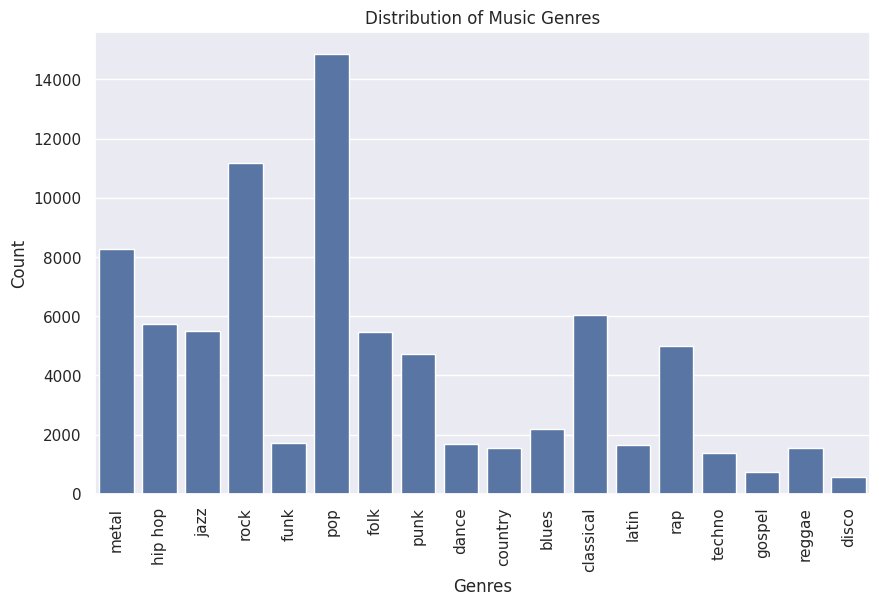

In [ ]:
# Visualize the distribution of the target variable 'genre_flag'
plt.figure(figsize=(10, 6))
sns.countplot(data=music_data, x=y_original)
plt.title('Distribution of Music Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The ***count plot*** visualizes the distribution of music genres in the dataset. Each bar represents the count of occurrences of a particular genre. This visualization allows us to understand the frequency of different genres and identify any imbalances or biases in the dataset. It helps in assessing the distribution of genres and determining their relative prevalence in the dataset.

###Method 3 -- Data Visualization: Correlation Matrix

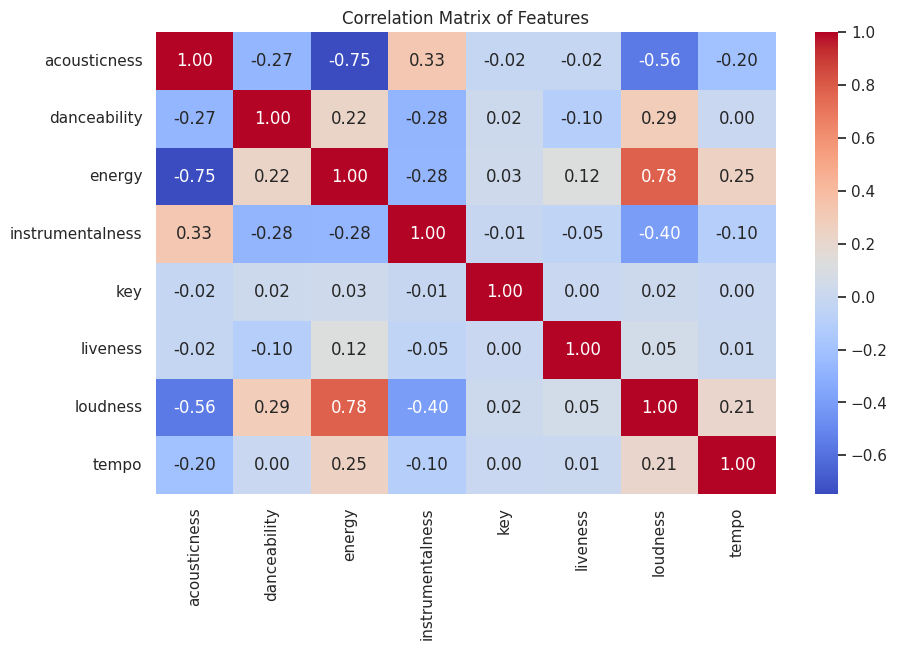

In [ ]:
# Visualize the correlation matrix of the features
plt.figure(figsize=(10, 6))
sns.heatmap(music_data.drop(columns=['genre_flag']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

The heatmap of the correlation matrix visualizes the pairwise correlations between numerical features in the dataset. Each cell in the heatmap represents the correlation coefficient between two features, ranging from -1 to 1. A high positive correlation (close to 1) indicates a strong positive relationship between features, while a high negative correlation (close to -1) indicates a strong negative relationship. This visualization helps identify patterns of association between features, which can guide feature selection and modeling decisions.

##Baseline

For this project, we are using accuracy as the evaluation metric to measure the performance of our baseline model.

In [ ]:
# Identify the most frequent class
most_frequent_class = Counter(y_encoded).most_common(1)[0][0]

# Create predictions array with most frequent class for all instances
y_pred_baseline = [most_frequent_class] * len(y_encoded)

# Calculate accuracy of the baseline model
accuracy_baseline = accuracy_score(y_encoded, y_pred_baseline)
print("Baseline Model Accuracy (Most Frequent Class):", accuracy_baseline)

Baseline Model Accuracy (Most Frequent Class): 0.18635206800145432


***Baseline Score:*** 0.1864 (18.64%)

This baseline score represents the accuracy achieved by predicting the most frequent genre for all samples in the validation set.